# Exploring the Titanic Dataset

Exploratory analysis using the Titanic dataset.

Read more about the titanic dataset here: https://www.kaggle.com/c/titanic

In [4]:
import pandas as pd


titanic_df = pd.read_csv("../datasets/titanic-dataset.csv")

In [22]:
import os
import pandas as pd
file_path = os.path.join("..", "datasets", "titanic-dataset.csv")
titanic_df = pd.read_csv(file_path)

# Data Exploration

Have a look at the dataset. These should be the variables in it:
    
    * survival: Survival (0 = No; 1 = Yes)
    * pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    * name: Name
    * sex: Sex
    * age: Age
    * sibsp: Number of Siblings/Spouses Aboard
    * parch: Number of Parents/Children Aboard
    * ticket: Ticket Number
    * fare: Passenger Fare
    * cabin: Cabin
    * embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
        
**pclass**: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way… Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way… Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

### Excercise 1: Data cleanup

Identify quantitative, categorical and ordinal variables.

Identify if there are columns with missing values and decide how to deal with them.

You could either remove the column, or replace the missing values with a sensible **robust** estimate

In [23]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#From this info we can see that some things are categorical like the object types and the int64 types are a mix of ordinal and cat
titanic_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
##Identify columns with missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
#Don't care about cabin missings, replace age with the median age
titanic_df['Age']= titanic_df['Age'].transform(lambda x: x.fillna(x.median()))

## Exercise 2: How Survival is correlated to other attributes of the dataset ? Find out the correlation coefficient.

You can also draw plots showing the correlation coefficient between variable

In [27]:
titanic_df['Sex']=pd.Categorical(titanic_df.Sex)
corr_matrix = titanic_df.corr()
corr_matrix



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<AxesSubplot:xlabel='Survived', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Age', ylabel='SibSp'>,
        <AxesSubplot:xlabel='SibSp', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Parch', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Fare', ylabel='SibSp'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Parch'>,
        <AxesSubplot:xlabel='Age', ylabel='Parch'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Parch'>,
        <AxesSubplo

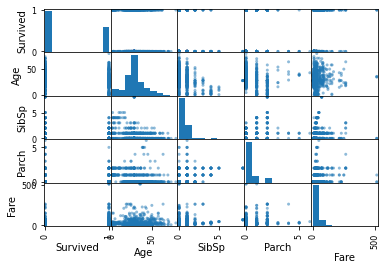

In [28]:
ATTRS = ["Survived", "Age", "SibSp","Parch", "Fare"]
# scatter matrix
df = titanic_df[ATTRS]
pd.plotting.scatter_matrix(df)


## Exercise 3: Did Sex play a role in Survival?

Advanced: you could also make sure that there are no other factors (e.g. age) confounding the impact of sex in survival.

For instance if a greater share of women than men were very old and their survival rate were lower this may be due to age factors rather than to sex.

In [31]:
import statsmodels.api as sm
titanic_df['Sex_code'] = titanic_df['Sex'].cat.codes

y = titanic_df['Survived']
x = titanic_df[['Age','Pclass','Sex_code']]

model = sm.OLS(y,x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.411
Model:                            OLS   Adj. R-squared (uncentered):              0.409
Method:                 Least Squares   F-statistic:                              206.2
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                   1.74e-101
Time:                        20:02:43   Log-Likelihood:                         -602.17
No. Observations:                 891   AIC:                                      1210.
Df Residuals:                     888   BIC:                                      1225.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0120      0.001     13.311      0.000       0.010       0.014
Pclass         0.1059      0.012      8.502      0.000       0.081       0.130
Sex_code      -0.4264      0.034    -12.626      0.000      -0.493      -0.360
==============================================================================
Omnibus:                       68.724   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.296
Skew:                           0.460   Prob(JB):                     3.26e-11
Kurtosis:                       2.326   Cond. No.                         69.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercise 4: Did class played role in survival ?

In [ ]:
#See above regression

## Exercise 5: Did being alone onboard play a role in survival ?

Think of how you can extract the alone variable from the existing ones.

In [50]:
import numpy as np

titanic_df["Alone"] = np.where(titanic_df.SibSp + titanic_df.Parch ==0, 1,0)

y = titanic_df['Survived']
x = titanic_df[['Age','Pclass','Sex_code','Alone']]

model = sm.OLS(y,x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.411
Model:                            OLS   Adj. R-squared (uncentered):              0.408
Method:                 Least Squares   F-statistic:                              154.5
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                   2.70e-100
Time:                        20:23:35   Log-Likelihood:                         -602.16
No. Observations:                 891   AIC:                                      1212.
Df Residuals:                     887   BIC:                                      1231.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0120      0.001     12.761      0.000       0.010       0.014
Pclass         0.1056      0.013      8.200      0.000       0.080       0.131
Sex_code      -0.4272      0.035    -12.176      0.000      -0.496      -0.358
Alone          0.0031      0.035      0.087      0.930      -0.066       0.072
==============================================================================
Omnibus:                       68.551   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.402
Skew:                           0.461   Prob(JB):                     3.09e-11
Kurtosis:                       2.328   Cond. No.                         79.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""